In [1]:
#%matplotlib widget
%matplotlib inline

In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

### format a better conforming file from poor OCR

In [7]:
fmt = "{:7s}  {:8s}  {:>10s}  {:>10s}  {:8s}  {:8s}  {:4s}\n"
p_input = Path('/Users/Mike/Dropbox/Tech Papers/chromatic correction/robb1983_data_pp5.txt')
p_out = Path('/Users/Mike/Dropbox/Tech Papers/chromatic correction/robb1983_data_pp6.txt')
with p_input.open() as f_input, p_out.open('w') as f_out:
    for line in f_input:
        if line[0] == '#':
            f_out.write(line)
        else:
            tokens = line.split()
            num_tokens = len(tokens)
            if num_tokens%7 == 0:
                if num_tokens == 7:
                    f_out.write(fmt.format(*tokens))
                else:
                    num_items = num_tokens//7
                    token_iter = iter(tokens)
                    out_lines = [[] for i in range(num_items)]
                    for i in range(7):
                        for ol in out_lines:
                            ol.append(next(token_iter))
                    for ol in out_lines:
                        f_out.write(fmt.format(*ol))
            else:
                print(len(tokens))
                f_out.write(line)


### process the formatted file in the as published form, i.e. with invalid scientific floating point formatting

In [4]:
n = []
nu1 = []
nu2 = []
name = []
cat = []
with p_out.open() as f_input:
    for line in f_input:
        if line[0] == '#':
            if line[1] != '-' and line[1] != 'G' and line[1] != 'T':
                tokens = line[1:].split()
                catalog = tokens[0]
        else:
            tokens = line.split()
            num_tokens = len(tokens)
            if num_tokens == 7:
                name.append(tokens[0])
                try:
                    n.append(float(tokens[1]))
                except ValueError:
                    print('n_str', catalog, tokens[0], tokens[1])
                    continue
                else:
                    try:
                        nu1_str = tokens[2][:-3] + 'E' + tokens[2][-3:]
                        nu1.append(float(nu1_str))
                    except ValueError:
                        print('nu1_str', catalog, tokens[0], nu1_str)
                        continue
                    else:
                        try:
                            nu2_str = tokens[3][:-3] + 'E' + tokens[3][-3:]
                            nu2.append(float(nu2_str))
                        except ValueError:
                            print('nu2_str', catalog, tokens[0], nu2_str)
                            continue
                        else:
                            cat.append(catalog)
            else:
                print(len(tokens))
                f_out.write(line)

### reformat file to use valid floating point input

In [8]:
fmt = "{:7s}  {:8s}  {:>11s}  {:>11s}  {:8s}  {:8s}  {:4s}\n"
p_input = Path('/Users/Mike/Dropbox/Tech Papers/chromatic correction/robb1983_data_pp6.txt')
p_out = Path('/Users/Mike/Dropbox/Tech Papers/chromatic correction/robb1983_data_final.txt')
with p_input.open() as f_input, p_out.open('w') as f_out:
    for line in f_input:
        if line[0] == '#':
            f_out.write(line)
        else:
            tokens = line.split()
            tokens[2] = tokens[2][:-3] + 'E' + tokens[2][-3:]
            tokens[3] = tokens[3][:-3] + 'E' + tokens[3][-3:]
            f_out.write(fmt.format(*tokens))

### read the reformatted file 

In [5]:
n = []
nu1 = []
nu2 = []
name = []
cat = []
with p_out.open() as f_input:
    for line in f_input:
        if line[0] == '#':
            if 'GLASS CATALOGUE' in line:
                tokens = line[1:].split()
                catalog = tokens[0]
        else:
            tokens = line.split()
            name.append(tokens[0])
            n.append(float(tokens[1]))
            nu1.append(float(tokens[2]))
            nu2.append(float(tokens[3]))
            cat.append(catalog)

In [6]:
cat[::20]

['SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'SCHOTT',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'OHARA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'HOYA',
 'CORNING-FRANCE',
 'CORNING-FRANCE',
 'CORNING-FRANCE',
 'CORNING-FRANCE',
 'CHANCE',
 'CHANCE',
 'CHANCE']

In [ ]:
glist = [()]

In [23]:
nu1_s = []
nu2_s = []
for i, c in enumerate(cat):
    if c == 'SCHOTT':
#        if nu1[i]>-0.125 and nu2[i]>0.05:
#            print(i,name[i],cat[i])
#            continue
        nu1_s.append(nu1[i])
        nu2_s.append(nu2[i])
#        if nu1[i] < -1000:
#            print(i,name[i],cat[i])

In [24]:
nu1_o = []
nu2_o = []
for i, c in enumerate(cat):
    if c == 'OHARA':
        nu1_o.append(nu1[i])
        nu2_o.append(nu2[i])
        if nu1[i] < -1000:
            print(i,name[i],cat[i])

In [25]:
nu1_cf = []
nu2_cf = []
for i, c in enumerate(cat):
    if c == 'CORNING-FRANCE':
        nu1_cf.append(nu1[i])
        nu2_cf.append(nu2[i])
        if nu1[i] > 0:
            print(i,name[i],cat[i])

In [26]:
nu1_ch = []
nu2_ch = []
for i, c in enumerate(cat):
    if c == 'CHANCE':
        nu1_ch.append(nu1[i])
        nu2_ch.append(nu2[i])
        if nu1[i] > 0:
            print(i,name[i],cat[i])

In [27]:
nu1_h = []
nu2_h = []
for i, c in enumerate(cat):
    if c == 'HOYA':
#        if nu1[i]>-0.0375:
#            print(i,name[i],cat[i])
#            continue
        nu1_h.append(nu1[i])
        nu2_h.append(nu2[i])


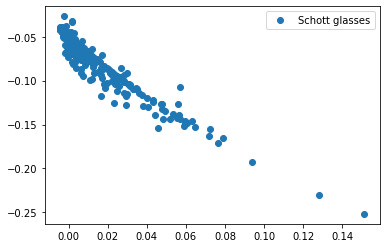

In [28]:
plt.plot(nu2_s, nu1_s, 'o', label='Schott glasses')
#plt.plot(nu2_o, nu1_o, '+', label='Ohara glasses')
#plt.plot(nu2_h, nu1_h, 's', label='Hoya glasses')
#plt.plot(nu2_cf, nu1_cf, 'x', label='Corning-France glasses')
#plt.plot(nu2_ch, nu1_ch, '*', label='Chance glasses')
plt.legend()
plt.show()

In [11]:
nu1[73]

-0.059555

In [20]:
cat[::20]

['GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS',
 'GLASS']